# Data Quality Report for Dublin Bikes Availability

### The CSV files referenced here are available to download [here.](https://drive.google.com/drive/folders/1cVK3-9skev3Xg-FhSA6Yl8HMqaucgfTz?usp=sharing)

### Importing Packages

In [1]:
#Import package pandas for data analysis
import pandas as pd

#Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

#For showing plots directly in the notebook run the command below
%matplotlib inline

### Understanding Initial Data Set

In [2]:
# importing csv file from the dynamic scraper

df = pd.read_csv('dublin_bikes_availablity.csv')
df.head()

,id,number,bike_stands,available_bike_stands,available_bikes,status,last_update,created_at
0,1,42,30,0,30,OPEN,2019-02-20 19:08:32,2019-02-20 19:10:01
1,2,30,20,17,3,OPEN,2019-02-20 19:02:00,2019-02-20 19:10:01
2,3,54,33,33,0,OPEN,2019-02-20 19:02:15,2019-02-20 19:10:01
3,4,108,40,26,13,OPEN,2019-02-20 19:01:08,2019-02-20 19:10:01
4,5,56,40,34,6,OPEN,2019-02-20 19:08:18,2019-02-20 19:10:01


In [3]:
# lads we have over a million rows from the last month!

df.shape[0]

1019825

In [4]:
# initial datatypes. 

df.dtypes

id                        int64
number                    int64
bike_stands               int64
available_bike_stands     int64
available_bikes           int64
status                   object
last_update              object
created_at               object
dtype: object

### Evaluating/Changing Data Types

|Feature|Datatype From|Datatype To|
|-------------------------|----------------------|------------------------|
|status|object|categorical|
|last_update|object|datetime64[ns]|
|created_at|object|datetime64[ns]|

In [5]:
# changing the feature status to datatype categorical 

df['status'] = df['status'].astype('category')

In [6]:
# changing features create_at and last_updated to datatype datetime64

df['created_at'] = pd.to_datetime(df.created_at)
df['last_update'] = pd.to_datetime(df.last_update)

# Let view our updated datatypes!

df.dtypes

id                                int64
number                            int64
bike_stands                       int64
available_bike_stands             int64
available_bikes                   int64
status                         category
last_update              datetime64[ns]
created_at               datetime64[ns]
dtype: object

### Fun ways to maniputlate DateTime datatypes!!!

In [11]:
# displaying the hour for feature created_at
print(df.created_at.dt.date[0], df.created_at.dt.hour[0])

2019-02-20 19


In [39]:
# displaying the name of each weekday for feature created_at

df.created_at.dt.weekday_name.head()

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
Name: created_at, dtype: object

In [40]:
# displaying a numerical representation of each weekday for feature created_at

df.created_at.dt.weekday.head()

0    2
1    2
2    2
3    2
4    2
Name: created_at, dtype: int64

In [41]:
# distplaying a a value for which day of the year it is for feature created_at

df.created_at.dt.dayofyear.head()

0    51
1    51
2    51
3    51
4    51
Name: created_at, dtype: int64

In [42]:
# displaying data for all features that are after the date '2019/03/06'

ts = pd.to_datetime('2019/03/06')
df.loc[df.created_at >= ts, :].head()

,id,number,bike_stands,available_bike_stands,available_bikes,status,last_update,created_at
391884,429288,42,30,12,18,OPEN,2019-03-05 23:49:36,2019-03-06 00:00:02
391885,429289,30,20,20,0,OPEN,2019-03-05 23:55:35,2019-03-06 00:00:02
391886,429290,54,33,31,2,OPEN,2019-03-05 23:51:10,2019-03-06 00:00:02
391887,429291,108,40,28,12,OPEN,2019-03-05 23:56:18,2019-03-06 00:00:02
391888,429292,56,40,23,17,OPEN,2019-03-05 23:51:05,2019-03-06 00:00:02


In [43]:
# displaying max value for feature created_at

df.created_at.max()

Timestamp('2019-03-25 14:00:02')

In [44]:
# displaying min value for feature created_at

df.created_at.min()

Timestamp('2019-02-20 19:10:01')

In [45]:
# displaying max - min values for feature created_at. This returns a string of 32 days

df.created_at.max() - df.created_at.min()

Timedelta('32 days 18:50:01')

In [46]:
# displaying max - min values for feature created_at. This returns an int of 32 

(df.created_at.max() - df.created_at.min()).days

32

In [47]:
# Adding columns to dataset displaying the numerical value for days of the week 
# The features added are 'create_at_weekday' and 'last_updated_weekday'

df['create_at_weekday'] = df.created_at.dt.weekday
df['last_updated_weekday'] = df.last_update.dt.weekday

In [48]:
df.head()

,id,number,bike_stands,available_bike_stands,available_bikes,status,last_update,created_at,create_at_weekday,last_updated_weekday
0,1,42,30,0,30,OPEN,2019-02-20 19:08:32,2019-02-20 19:10:01,2,2
1,2,30,20,17,3,OPEN,2019-02-20 19:02:00,2019-02-20 19:10:01,2,2
2,3,54,33,33,0,OPEN,2019-02-20 19:02:15,2019-02-20 19:10:01,2,2
3,4,108,40,26,13,OPEN,2019-02-20 19:01:08,2019-02-20 19:10:01,2,2
4,5,56,40,34,6,OPEN,2019-02-20 19:08:18,2019-02-20 19:10:01,2,2


### Descriptive Statistics for Categorical Features

In [49]:
# Descriptive statistics for all the DateTime features

df.select_dtypes(['datetime64[ns]']).describe().T

,count,unique,top,freq,first,last
last_update,1019825,533693,2019-03-18 03:27:27,338,2019-02-20 18:59:04,2019-03-25 13:59:01
created_at,1019825,10173,2019-03-12 12:30:02,113,2019-02-20 19:10:01,2019-03-25 14:00:02


### Descriptive Statistics for Categorical Features

In [50]:
# Descriptive statistics for all the categorical features

df.select_dtypes(['category']).describe().T

,count,unique,top,freq
status,1019825,2,OPEN,1013976


### Descriptive Statistics for Categorical Features

In [51]:
# Keep only the numeric features.

numeric_columns = df.select_dtypes(['int64']).columns
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
id,1019825.0,541584.777729,306178.290062,1.0,290439.0,547316.0,803854.0,1066494.0
number,1019825.0,58.840708,32.852210,2.0,31.0,59.0,87.0,115.0
bike_stands,1019825.0,32.011585,7.562254,16.0,29.0,30.0,40.0,40.0
available_bike_stands,1019825.0,20.869996,11.735401,0.0,12.0,20.0,30.0,44.0
available_bikes,1019825.0,10.838748,10.662859,0.0,1.0,8.0,18.0,40.0
create_at_weekday,1019825.0,3.135734,2.013659,0.0,1.0,3.0,5.0,6.0
last_updated_weekday,1019825.0,3.137157,2.013220,0.0,1.0,3.0,5.0,6.0


### Checking for Duplicates

In [52]:
# Checking where there are any duplicate rows within the data set by creating a new row
# If the boolean value is True within the column is_duplicate it means that the row is dublicate

df["is_duplicate"]= df.duplicated()
df.loc["is_duplicate"]=True
df.head()

,id,number,bike_stands,available_bike_stands,available_bikes,status,last_update,created_at,create_at_weekday,last_updated_weekday,is_duplicate
0,1,42,30,0,30,OPEN,2019-02-20 19:08:32,2019-02-20 19:10:01,2,2,False
1,2,30,20,17,3,OPEN,2019-02-20 19:02:00,2019-02-20 19:10:01,2,2,False
2,3,54,33,33,0,OPEN,2019-02-20 19:02:15,2019-02-20 19:10:01,2,2,False
3,4,108,40,26,13,OPEN,2019-02-20 19:01:08,2019-02-20 19:10:01,2,2,False
4,5,56,40,34,6,OPEN,2019-02-20 19:08:18,2019-02-20 19:10:01,2,2,False


In [53]:
# Counting the number of duplicate rows
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])

# Counting the number of duplicate columns
print('Duplicate columns:',df.columns.size - df.columns.unique().size)

Duplicate rows: 0
Duplicate columns: 0


### Box Plots for Continuous Features

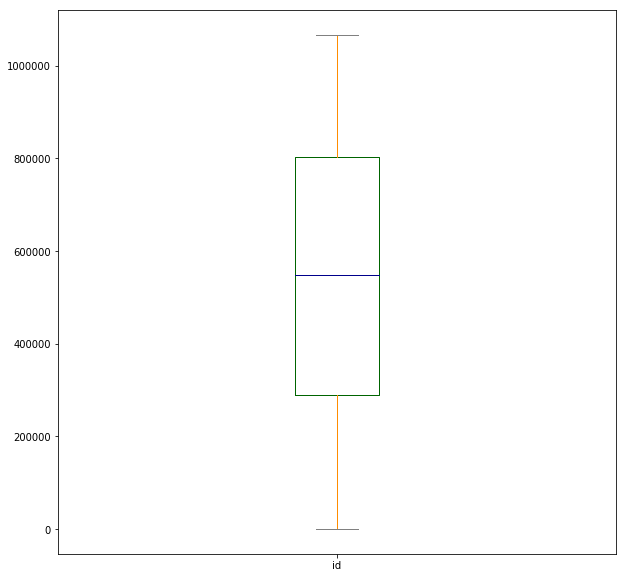

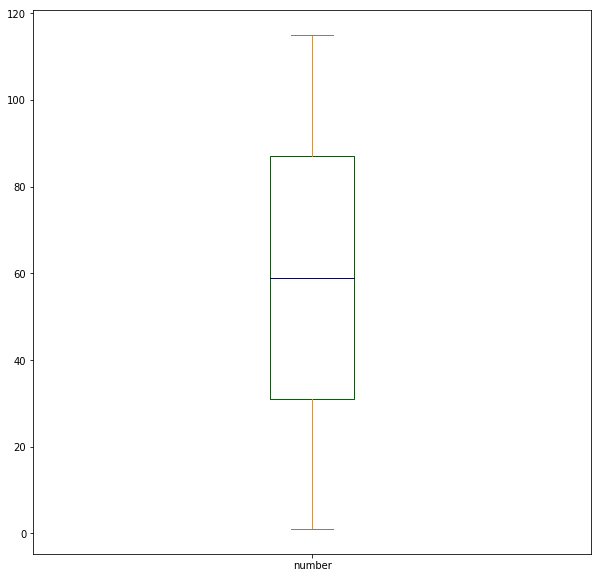

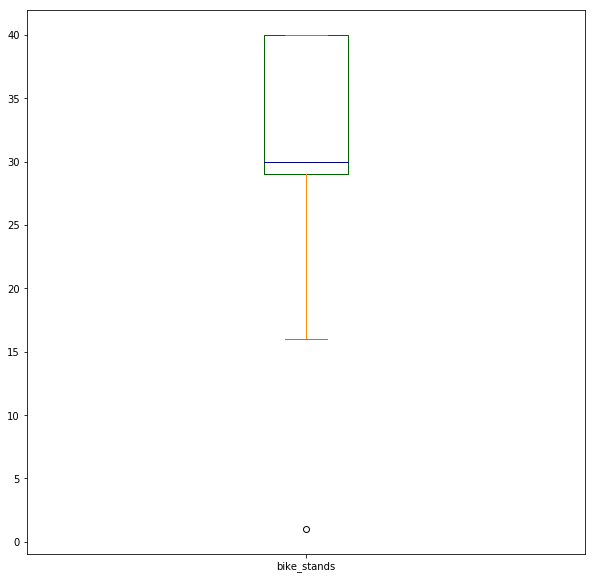

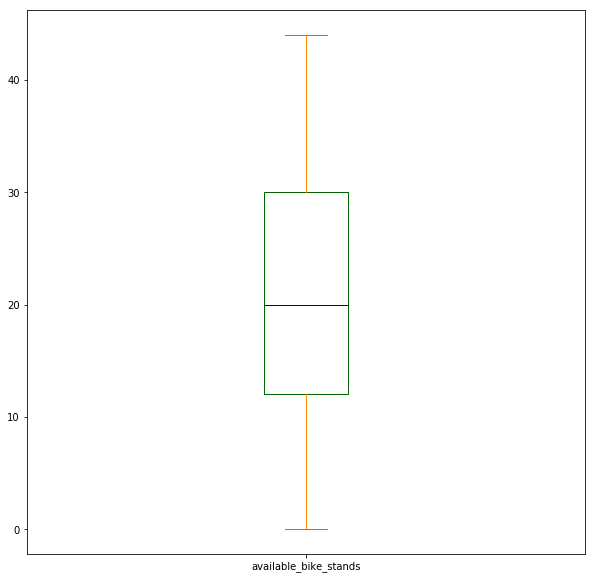

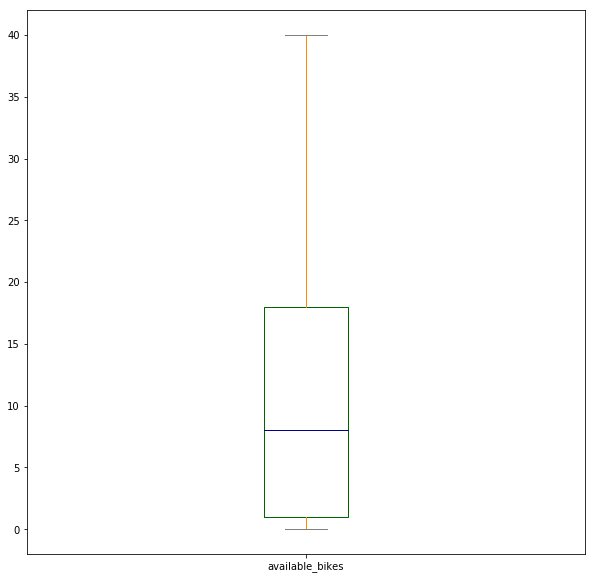

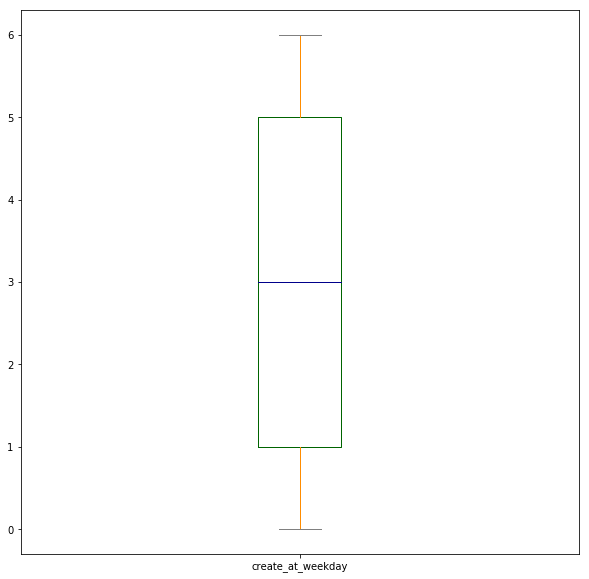

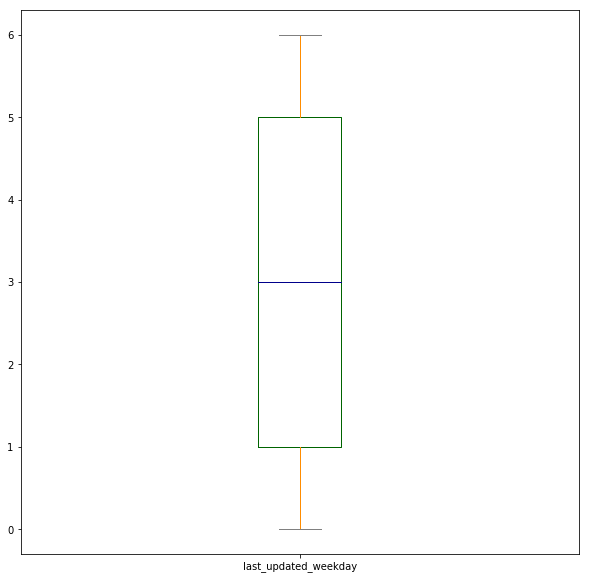

In [54]:
# Box plots for all continuous features within the data set

numeric_columns = df.select_dtypes(['int64']).columns
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

for col in numeric_columns:
    f = df[col].plot(color= color, kind='box', figsize=(10, 10))
    plt.show()

### Histograms for Continuous Features

In [ ]:
# Histograms for all continuous features within the dataset

plt.figure()
df[numeric_columns].hist(figsize=(20, 20))

### Scatter Plots Comparing All Continuous Features

In [ ]:
for i in numeric_columns:
     for j in numeric_columns:
         df.plot(kind='scatter', x=i, y=j)

### Barplots for Categorical Features

In [ ]:
df['status'].value_counts().plot(kind='bar')

### Linear(?) Plots for DateTime Features

In [12]:
df.dtypes

id                                int64
number                            int64
bike_stands                       int64
available_bike_stands             int64
available_bikes                   int64
status                         category
last_update              datetime64[ns]
created_at               datetime64[ns]
dtype: object

In [ ]:
df.create_at_weekday.value_counts().sort_index().plot()

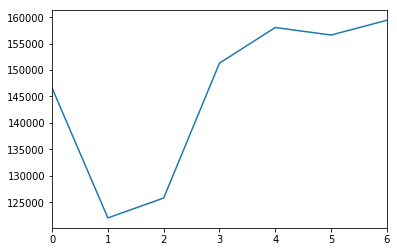

In [31]:
df.last_updated_weekday.value_counts().sort_index().plot()

Note that both date time features out put the same information on the graph!

### Save updated_availability csv File

In [ ]:
#Save df to new csv file
#df.to_csv('updated_availability.csv')